# Import Libraries

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Load Data

In [2]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

X = df.drop(columns=["target", "has_disease"])
y = df["has_disease"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply PCA (initially all components)

In [3]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

## Plot cumulative explained variance

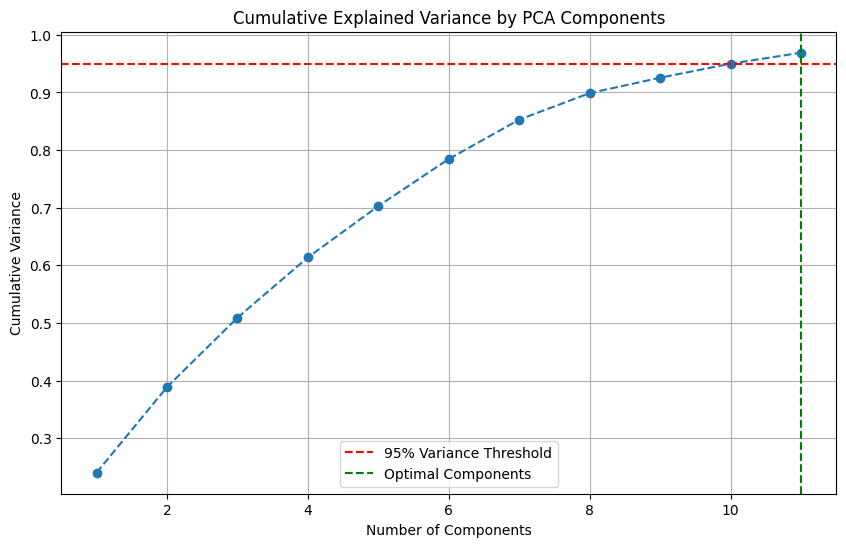

✔️ Optimal number of components to retain 95% variance: 11


In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label='Optimal Components')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.legend()
plt.grid(True)
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✔️ Optimal number of components to retain 95% variance: {n_components}")


# Transform dataset using optimal components

In [5]:
pca_train = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_train['has_disease'] = y_train.values

pca_test = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_test['has_disease'] = y_test.values

In [6]:
X_pca_all = pca.transform(X)  # Apply PCA to the full dataset

# Visualize the first two principal components

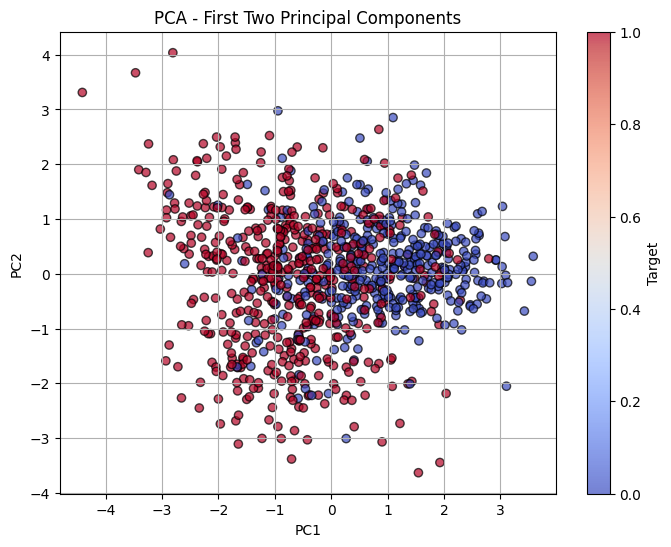

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.grid(True)
plt.colorbar(label='Target')
plt.show()

# Save the PCA Data

In [8]:
pca_train.to_csv("../data/pca_train.csv", index=False)
pca_test.to_csv("../data/pca_test.csv", index=False)

# Save the fitted PCA object
joblib.dump(pca, "../models/pca_transformer.pkl")

['../models/pca_transformer.pkl']